In [1]:
%load_ext autoreload
%autoreload 2

import analysis
import lmpsetup
import hmdsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

import mdtraj as md
import statsmodels.tsa.stattools

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
[0.82617274 0.8933641  0.88722295 0.89870762 1.18735856] [5.81800980e-04 1.01562091e-04 1.29691923e-05 2.12826528e-04
 5.05693672e-04]


/home/adria/scripts/lammps/lammps/analysis.py:831: RuntimeWarning: invalid value encountered in power
  return A * (x - Tc_sc) ** beta


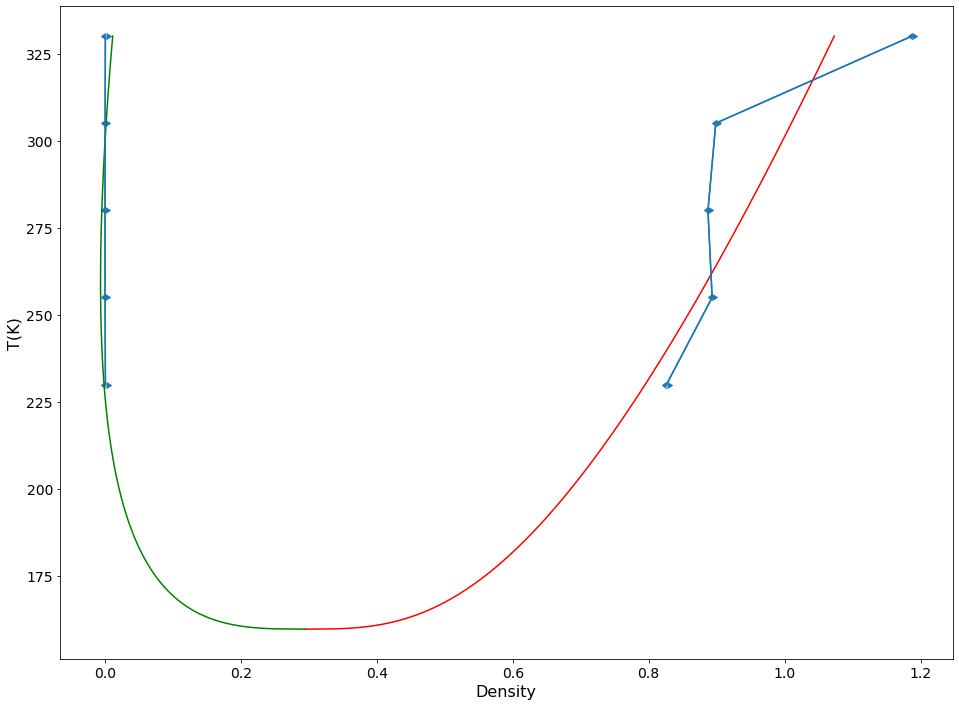

In [2]:
p=plotter.Plotter()
p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4x50',
       observable='phase_diagram', plot_id="better1", equil_frames=300)


## Summary

**[1. Phase diagrams](#1)** : We try to build the phase diagrams for our 50 chain simulations on an HPS scale of 1.0 and 0.7.

**[2. Generate new slabs](#2)** : 

**[3. HOOMD Testing](#3)** : 

**[4. Slab Method Construction](#4)** : 

### 1. Phase diagrams <a id='1'></a>

In [2]:
p=plotter.Plotter()

**For 1.0 HPS-T and CPEB4**:

In [3]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/CPEB4x50',
#        observable='phase_diagram', plot_id=0, equil_frames=0)
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/CPEB4x50', equil_frames=0).save_movies()

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


**For 1.0 HPS-T and CPEB4_D4**:

In [4]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/CPEB4_D4x50',
#        observable='phase_diagram', plot_id=1, equil_frames=0)
t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/CPEB4_D4x50',  equil_frames=0).save_movies()

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


**For 0.7 HPS-T and CPEB4**:

In [33]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4x50',
#        observable='phase_diagram', plot_id=2, equil_frames=0, last=-2)
wt7 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4x50',  equil_frames=0)
dilute_dens, cond_dens = wt7.phase_diagram()

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
1325.0804
1716.0


/home/adria/scripts/lammps/lammps/analysis.py:821: RuntimeWarning: invalid value encountered in true_divide
  condensed_densities.append(mass_condensed/volume_condensed)


1030.4885
1716.0
964.75244
1716.0
1042.6832
1716.0
1105.1588
1716.0


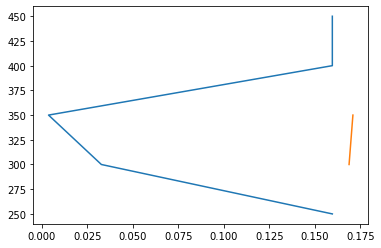

In [38]:
plt.plot(dilute_dens.mean(axis=1), wt7.temperatures)
plt.plot(cond_dens.mean(axis=1), wt7.temperatures)

| 250| 300 | 350 | 400 | 450 |
| :---: | :---: | :---: | :---: | :---: |
|  <img src='img/26May/T0_WT.gif' width=400> | <img src='img/26May/T1_WT.gif' width=400> | <img src='img/26May/T2_WT.gif' width=400> | <img src='img/26May/T3_WT.gif' width=400> | <img src='img/26May/T4_WT.gif' width=400> |

**For 0.7 HPS-T and CPEB4_D4**:

In [46]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50',
#        observable='phase_diagram', plot_id=3, equil_frames=0, last=-2)
# t = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50',  equil_frames=0).save_movies()
wt7 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50',  equil_frames=100)
dilute_dens, cond_dens = wt7.phase_diagram()

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


[0.10240691 0.15370725 0.16532261] [0.01187179 0.00346415 0.00629555]


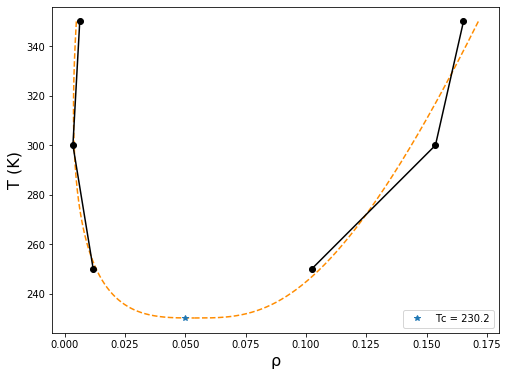

In [80]:
plt.figure(figsize=(8,6))
dilute_err = wt7.block_error(observable=dilute_dens)
cond_err = wt7.block_error(observable=cond_dens)
plt.xlabel("ρ", fontsize=16)
plt.ylabel("T (K)", fontsize=16)
p=plt.errorbar(dilute_dens.mean(axis=1)[:-2], wt7.temperatures[:-2], xerr=dilute_err[:-2], color='black', marker='o')
plt.errorbar(cond_dens.mean(axis=1)[:-2],wt7.temperatures[:-2], color=p[0].get_color(),marker='o', xerr=cond_err[:-2])

rho_solv_fit, rho_drop_fit, critical_T, ext_T, critical_rho = wt7.find_Tc_from_diagram(rho_condensed=cond_dens.mean(axis=1)[:-2], rho_solvated=dilute_dens.mean(axis=1)[:-2], temperatures=wt7.temperatures[:-2])
p2 = plt.plot(rho_solv_fit, ext_T,'--', color='darkorange')
plt.plot(rho_drop_fit, ext_T,'--', color=p2[0].get_color())
plt.plot(0.050, critical_T[0], '*', label=f"Tc = {critical_T[0]:.1f}")
plt.legend()

| 250| 300 | 350 | 400 | 450 |
| :---: | :---: | :---: | :---: | :---: |
|  <img src='img/26May/T0_D4.gif' width=400> | <img src='img/26May/T1_D4.gif' width=400> | <img src='img/26May/T2_D4.gif' width=400> | <img src='img/26May/T3_D4.gif' width=400> | <img src='img/26May/T4_D4.gif' width=400> |

### 2. Generate new slabs <a id='2'></a>

In [87]:
temperatures = np.linspace(230,330,5)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4x50',
                  host='@perdiu41',
                  temper=False,
                  protein='CPEB4',
                  chains=20, 
                  model='HPS-T',
                  save=20000,
                  t=int(1e9),
                  use_random=True,
                  slab=True,
                  processors=3,
                  hps_scale=0.6,
                  temperatures=temperatures,
                  debye=0.1).write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/CONTACT-TEST2 for LAF-1_RGG     ║
║---------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                      ║
║       - Model = HPS                                                                               ║
║       - Chains = 100                                                                              ║
║       - Ionic Strength (mM) = 0.1                                                                 ║
║       - Medium Permittivity = 80.0                                                                ║
║       - Temperatures (K) = [250]                                                                  ║
║       - HPS Scale = 1.0                                                         

In [4]:
temperatures = np.linspace(230,330,5)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50',
                  host='@perdiu38',
                  temper=False,
                  protein='CPEB4_D4',
                  chains=20, 
                  model='HPS-T',
                  save=20000,
                  t=int(1e9),
                  use_random=True,
                  slab=True,
                  processors=3,
                  hps_scale=0.6,
                  temperatures=temperatures,
                  debye=0.1).write_hps_files()

[230. 255. 280. 305. 330.]
╔══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50 for CPEB4_D4     ║
║----------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                             ║
║       - Model = HPS-T                                                                                    ║
║       - Chains = 20                                                                                      ║
║       - Ionic Strength (mM) = 0.1                                                                        ║
║       - Medium Permittivity = 80.0                                                                       ║
║       - Temperatures (K) = [230. 255. 280. 305. 330.]                                              

The slab might still be too big, so we run some more with expanded z-axis

In [6]:
temperatures = np.linspace(230,330,5)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4x50',
                  host='@perdiu40',
                  temper=False,
                  protein='CPEB4',
                  chains=20, 
                  model='HPS-T',
                  save=20000,
                  t=int(1e9),
                  use_random=True,
                  slab=True,
                  processors=3,
                  hps_scale=0.6,
                  temperatures=temperatures,
                  debye=0.1).write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4x50 for CPEB4     ║
║-----------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                        ║
║       - Model = HPS-T                                                                               ║
║       - Chains = 20                                                                                 ║
║       - Ionic Strength (mM) = 0.1                                                                   ║
║       - Medium Permittivity = 80.0                                                                  ║
║       - Temperatures (K) = [230. 255. 280. 305. 330.]                                               ║
║       - HPS Scale = 0.6                                       

In [7]:
temperatures = np.linspace(230,330,5)

lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4_D4x50',
                  host='@perdiu42',
                  temper=False,
                  protein='CPEB4_D4',
                  chains=20, 
                  model='HPS-T',
                  save=20000,
                  t=int(1e9),
                  use_random=True,
                  slab=True,
                  processors=3,
                  hps_scale=0.6,
                  temperatures=temperatures,
                  debye=0.1).write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4_D4x50 for CPEB4_D4     ║
║-----------------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                              ║
║       - Model = HPS-T                                                                                     ║
║       - Chains = 20                                                                                       ║
║       - Ionic Strength (mM) = 0.1                                                                         ║
║       - Medium Permittivity = 80.0                                                                        ║
║       - Temperatures (K) = [230. 255. 280. 305. 330.]                                                     ║
║       - 

Results are :

In [12]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4x50',
#        observable='phase_diagram', plot_id="goodn", equil_frames=0)
analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50', equil_frames=0).save_movies()

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [13]:
# p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50',
#        observable='phase_diagram', plot_id="goodn", equil_frames=0)
analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4x50', equil_frames=0).save_movies()

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [8]:
p.plots["better1"] = {}
p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4x50',
       observable='phase_diagram', plot_id="better1", equil_frames=0, last=-1)

KeyError: 0

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
[0.85182446 0.82616609 1.12010231 1.12414491 1.2427968 ] [0.00011465 0.00047328 0.00448169 0.00086889 0.0024506 ]


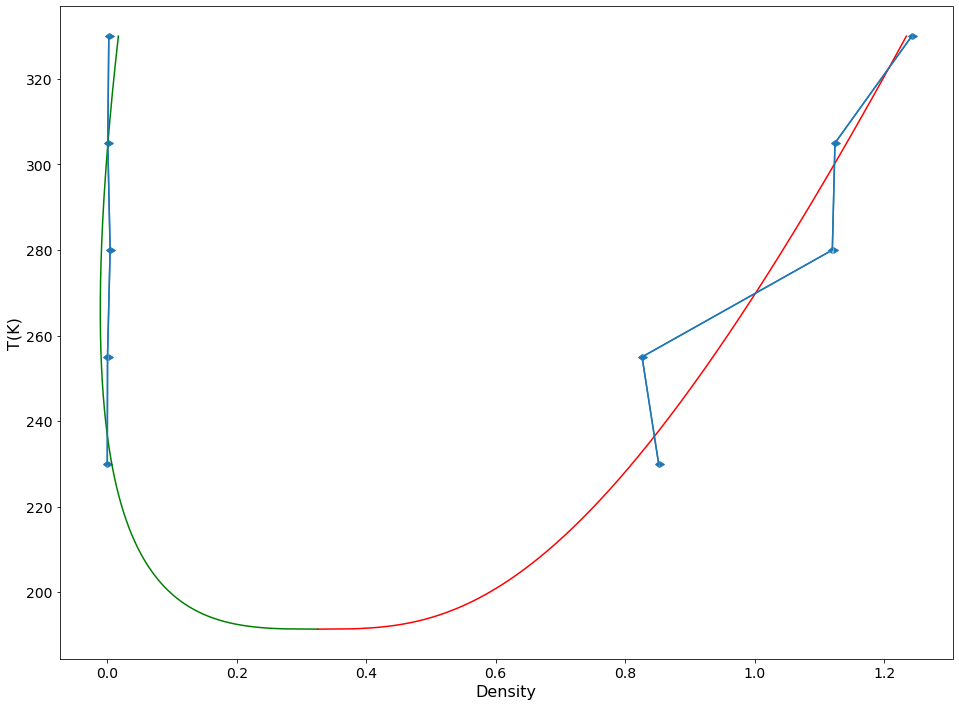

In [4]:
p.plot(path='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red2-CPEB4_D4x50',
       observable='phase_diagram', plot_id="better2", equil_frames=0)

### 3. HOOMD testing <a id='3'></a>

The implementation of HPS on HOOMD is concluded as can be seen from the Energy and Rg plots :

> Run Completed at 2.16% for CPEB4. Ran 21615000 steps for a total of 4324 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


Text(0, 0.5, 'P(E)')

<Figure size 1152x864 with 0 Axes>

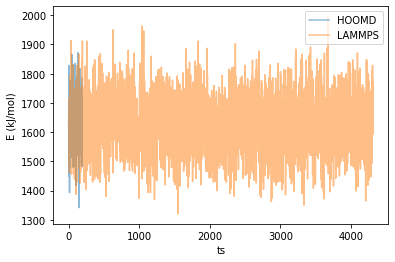

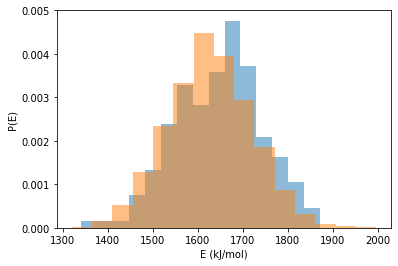

In [137]:
# red test
# HOOMD DATA
plt.figure(figsize=(16,12))
import os

hmd_dir = '/home/adria/irb/prod/FINAL'
with open(os.path.join(hmd_dir,'log_300.log'), 'r') as log:
    l = log.readlines()[1:]
hmd_data = np.genfromtxt(l)

# LAMMPS DATA
lmp = analysis.Analysis(oliba_wd='/home/adria/perdiux/all_test/FINAL', equil_frames=0)
E_HMD = hmd_data[10:200,1]+hmd_data[10:200,2]
E_LMP = (lmp.data[0,10:,1]+lmp.data[0,10:,2])*4.184

plt.figure()
plt.plot(E_HMD, label='HOOMD', alpha=0.5)
plt.plot(E_LMP, label='LAMMPS', alpha=0.5)
plt.ylabel("E (kJ/mol)")
plt.xlabel("ts")
plt.legend()

plt.figure()
plt.hist(E_HMD, label='HOOMD', alpha=0.5, density=True, bins=15);
plt.hist(E_LMP, label='LAMMPS', alpha=0.5, density=True, bins=15);
plt.xlabel("E (kJ/mol)")
plt.ylabel("P(E)")

> Run Completed at 2.16% for CPEB4. Ran 21615000 steps for a total of 4324 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


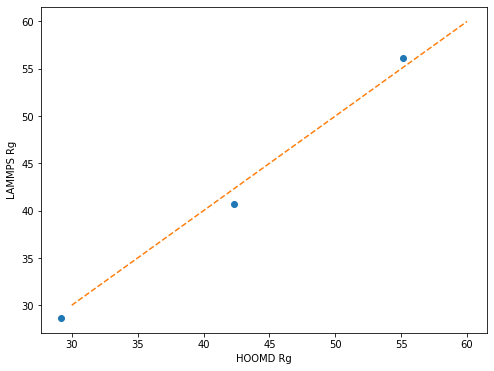

In [138]:
temperatures = [300,355,427]
hmd_rgs = []
for temp in temperatures:
    t = md.load(f'/home/adria/irb/prod/FINAL/trajectory_{temp}.dcd', top='/home/adria/irb/prod/FINAL/topo.pdb')
    rg = md.compute_rg(t)
    hmd_rgs.append(rg[:3000].mean()*100)

h = analysis.Analysis(oliba_wd='/home/adria/perdiux/all_test/FINAL')
lmp_rgs = h.rg().mean(axis=1)

plt.figure(figsize=(8,6))
plt.ylabel("LAMMPS Rg")
plt.xlabel("HOOMD Rg")
plt.plot(hmd_rgs, lmp_rgs, 'o')
plt.plot(np.linspace(30,60,100), np.linspace(30,60,100), '--')

What's left is to implement slab, HPS and gHPS to move away from CPU lammps and into GPU HOOMD

### 4. Slab method construction <a id='4'></a>

It's a multistep process, first we align every frame's droplet so that we can fit a function later on. The alignment is based on the process described in this paper : https://aip.scitation.org/doi/10.1063/1.5033958

Main difference is that we do not have two species here so we must be contempt with a density:

In [92]:
slab_test = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50', equil_frames=0)
xa, xshift, slab_bins = slab_test.paper_density_profile(noise=True)

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


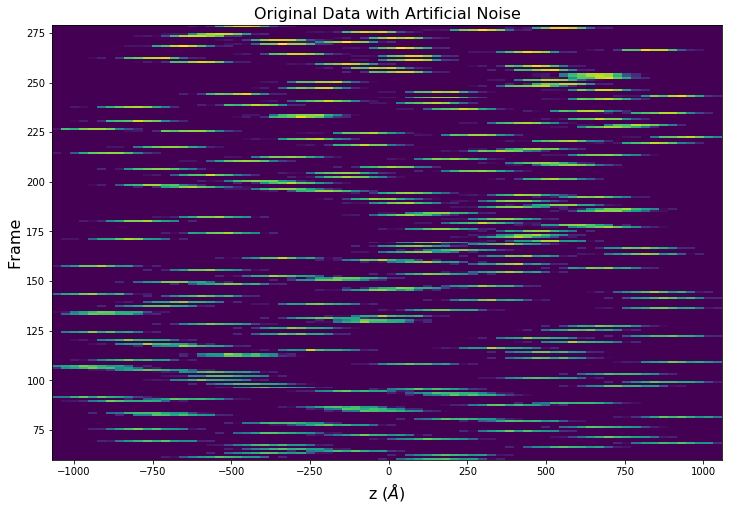

In [98]:
plt.figure(figsize=(12,8))
plt.title("Original Data with Artificial Noise", fontsize=16)
plt.xlabel("z ($\AA$)", fontsize=16)
plt.ylabel("Frame", fontsize=16)
plt.imshow(xa[60:,30:-30], extent=[slab_bins.min(), slab_bins.max(),60,xa.shape[0]], aspect='auto')

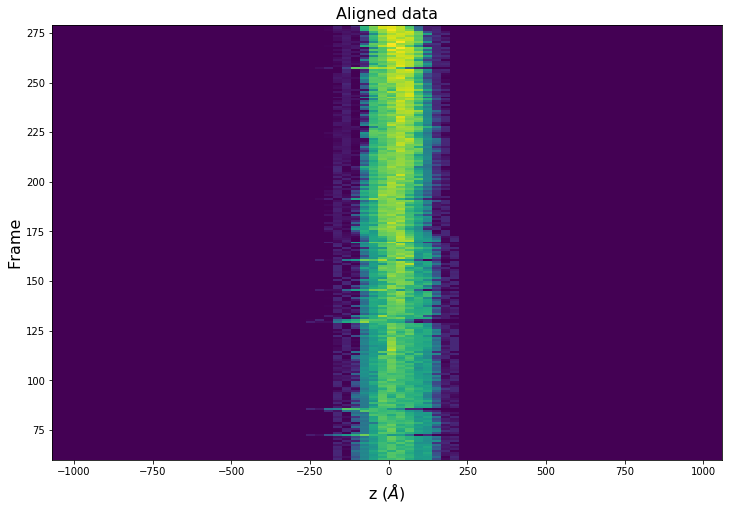

In [99]:
plt.figure(figsize=(12,8))
plt.xlabel("z ($\AA$)", fontsize=16)
plt.ylabel("Frame", fontsize=16)
plt.title("Aligned data", fontsize=16)
plt.imshow(xshift[60:,30:-30], extent=[slab_bins.min(), slab_bins.max(),60,xshift.shape[0]], aspect='auto')

Without artificially added noise we obtain :

In [12]:
slab_test = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50', equil_frames=0)
xa, xshift, slab_bins = slab_test.paper_density_profile(noise=False)

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


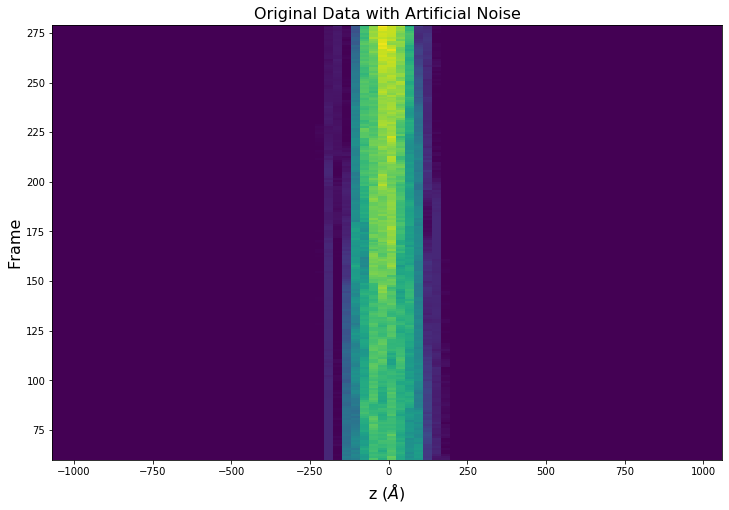

In [13]:
plt.figure(figsize=(12,8))
plt.title("Original Data without Artificial Noise", fontsize=16)
plt.xlabel("z ($\AA$)", fontsize=16)
plt.ylabel("Frame", fontsize=16)
plt.imshow(xa[60:,30:-30], extent=[slab_bins.min(), slab_bins.max(),60,xa.shape[0]], aspect='auto')

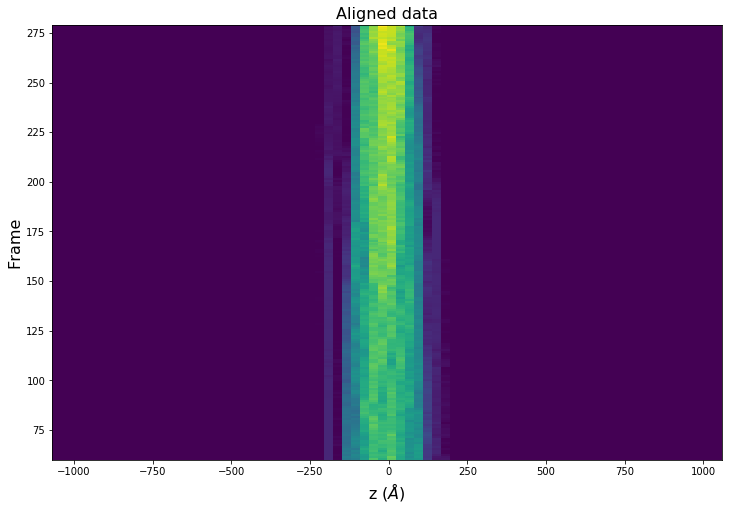

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel("z ($\AA$)", fontsize=16)
plt.ylabel("Frame", fontsize=16)
plt.title("Aligned data", fontsize=16)
plt.imshow(xshift[60:,30:-30], extent=[slab_bins.min(), slab_bins.max(),60,xshift.shape[0]], aspect='auto')

and so alignment seems to be not really necessary

Then we obtain the average density profile and fit a function to obtain the interface boundary. In my case, I used a tanh profile but an erf profile is also possible. Specifically, the funcion I used is :
\begin{equation}
    \rho(z) = \rho_0 - \rho_0\tanh(s(z+z_0))
\end{equation}

with $\rho_0$, $s$ and $z_0$ as free parameters. Then the interface is picked as that value of z where the density is 10% of the maximum density on the droplet

In [67]:
slab_test = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Droplets/Red-CPEB4_D4x50', equil_frames=0)
z, rho_z, og_rho_z = slab_test.density_profile(noise=False)
z_fit, rho_fit, tanh_fit, interface_pos = slab_test.interface_position(rho_z=rho_z.mean(axis=0), slab_bins=slab_bins)

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


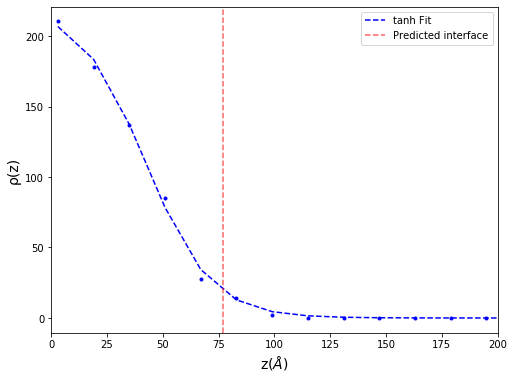

In [68]:
plt.figure(figsize=(8,6))
plt.xlim(0,200)
plt.xlabel("z($\AA$)", fontsize=14)
plt.ylabel("ρ(z)", fontsize=14)
plt.plot(z_fit,rho_fit,'bo', markersize=3)
plt.plot(z_fit,tanh_fit,'--b', label='tanh Fit')
plt.axvline(interface_pos, linestyle='dashed',color='red', alpha=0.6, label='Predicted interface')
plt.legend()

We get a mean density profile for all frames and we therefore get an interface position for all frames. Which might not be good. Let's see how the interface position varies with each frame :

Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)
Interface fit failed, returning 0 (no interface)


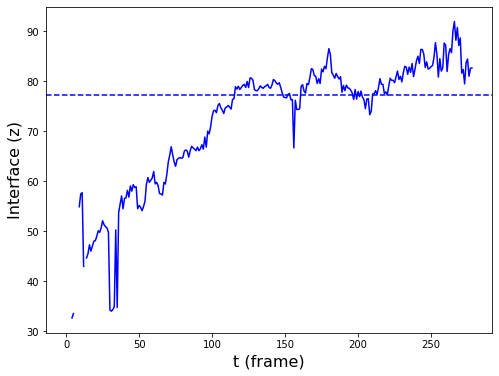

In [74]:
plt.figure(figsize=(8,6))
interfaces = []
for frame in range(rho_z.shape[0]):
    rho_f = rho_z[frame,:]
    z_fit, rho_fit, tanh_fit, pos = slab_test.interface_position(rho_f, slab_bins=slab_bins)
    interfaces.append(pos)
plt.xlabel("t (frame)", fontsize=16)
plt.ylabel("Interface (z)", fontsize=16)
plt.plot(interfaces, color='b')
plt.axhline(interface_pos, linestyle='--', color='b')

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
1805
104.15835
1576.0


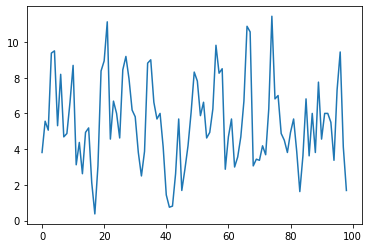

In [25]:
slab_test = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50', equil_frames=0)
print(slab_test.structures[0].n_frames)
z, rho_z, og_rho_z = slab_test.density_profile(noise=False, T=0)
plt.plot(og_rho_z[-1,:])
# z_fit, rho_fit, tanh_fit, interface_pos = slab_test.interface_position(rho_z=rho_z.mean(axis=0), slab_bins=z)

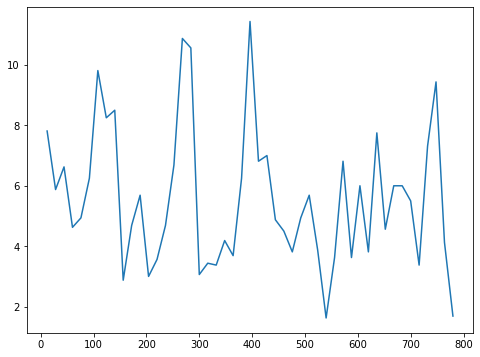

In [27]:
plt.figure(figsize=(8,6))
interfaces = []
# for frame in range(rho_z.shape[0]):
rho_f = rho_z[-1,:]
z_fit, rho_fit, tanh_fit, pos = slab_test.interface_position(rho_f, slab_bins=z)
# interfaces.append(pos)
# plt.plot(z_fit, tanh_fit)
plt.plot(z_fit, rho_fit)

# plt.xlabel("t (frame)", fontsize=16)
# plt.ylabel("Interface (z)", fontsize=16)
# plt.plot(interfaces, color='b')
# plt.axhline(interface_pos, linestyle='--', color='b')

In [19]:
md.load('/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50/dcd_traj_0.dcd', top='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Red-CPEB4_D4x50/topo.pdb')

<mdtraj.Trajectory with 2698 frames, 8800 atoms, 8800 residues, and unitcells at 0x7f659bd411d0>